Dataset view:
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windsp

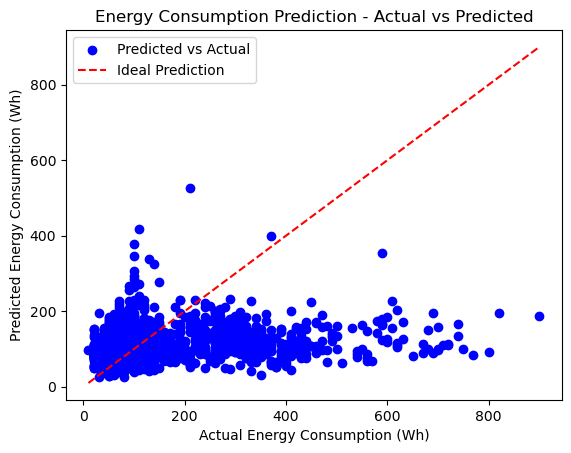

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the uploaded file

df = pd.read_csv(r"C:\Users\subhash\Downloads\appliances+energy+prediction\energydata_complete.csv")

# Display dataset preview
print("Dataset view:\n", df.head())

# Select relevant features for energy consumption prediction
feature = ["T1", "RH_1", "T2", "RH_2", "T3", "RH_3", "T4", "RH_4", "T5", "RH_5"]  # Example features
target_val = "Appliances"  # Energy consumption column

# Define X (features) and y (target variable)
X = df[feature]
y = df[target_val]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Coefficients: {model.coef_}")  # Weights for each feature
print(f"Intercept: {model.intercept_}")

# Visualization: Actual vs Predicted Energy Consumption
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Energy Consumption (Wh)")
plt.ylabel("Predicted Energy Consumption (Wh)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.legend()
plt.title("Energy Consumption Prediction - Actual vs Predicted")
plt.show()
